In [30]:
# Importing the necessary requirements
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [31]:
# data creation
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0) # generate sample blobs


In [32]:
X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
X.shape

(750, 2)

In [35]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [36]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db

DBSCAN(eps=0.3, min_samples=10)

the eps have to be carefully choosen it shouldnt be too small since it will not be able to accomodate anyone,  and it should be too big since it will accomodate everyone.

the default eps is 0.5

In [37]:
db.fit(X)

DBSCAN(eps=0.3, min_samples=10)

In [38]:
# we are calculating this for showcasing in a diagram
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # creating an array of true and false as the same size as db.label
core_samples_mask[db.core_sample_indices_] = True # setting the indices of the core regions to True
labels = db.labels_ # similar to the model.fit(), it gives the labels of the clustered data

In [39]:
# number of clusters in lablels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the dbscan algorithm
n_noise_ = list(labels).count(-1) # calculating the number of clusters 

In [40]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

"""Homogeneity metric of a cluster labelling given a ground truth.

A clustering result satisfies homogenity if all its clusters 
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


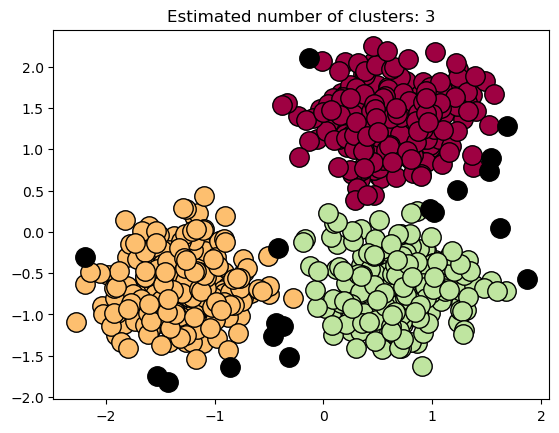

In [41]:
# plot result
import matplotlib.pyplot as plt

# black is used for noise
unique_labels = set(labels) # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))] # creating the list of colors, generating the colormap

for k, col in zip(unique_labels, colors):
    
    if k == -1:
        # block used for noise
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k) # assigning class members for each class
    
    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [42]:
# evaluation of dbscan
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626
